In [1]:
#A_ch02_0051_simpleLinear_20180823.ipynb
#以scikit-learn 實作 simple linear regression (Diamond price)

In [2]:
#step 0: 檢視資料 carats.csv 就是excel的csv档案
!type carats.csv

carats,price
1.01,7366
0.49,985
0.31,544
1.51,9140
0.37,493
0.73,3011
1.53,11413
0.56,1814
0.41,876
0.74,2690
0.63,1991
0.6,4172
2.06,11764
1.1,4682
2.02,15996
0.34,695


In [3]:
#step 1: 準備資料
import pandas as pd
import numpy as np

In [4]:
#step 1.1: 以pandas.read_csv()
#讀取 csv檔,成為DataFrame 'df1'
df1=pd.read_csv('carats.csv')

In [5]:
#step 1.2: 檢視 df1
df1

,carats,price
0,1.01,7366
1,0.49,985
2,0.31,544
3,1.51,9140
4,0.37,493
5,0.73,3011
6,1.53,11413
7,0.56,1814
8,0.41,876
9,0.74,2690


In [6]:
#step 1.3: feature X ,df1.carats
#          target y, df1.price
X=df1.carats.values
y=df1.price.values

In [7]:
#step 1.4: 檢視 X,y
X

array([ 1.01,  0.49,  0.31,  1.51,  0.37,  0.73,  1.53,  0.56,  0.41,
        0.74,  0.63,  0.6 ,  2.06,  1.1 ,  2.02,  0.34])

In [8]:
y

array([ 7366,   985,   544,  9140,   493,  3011, 11413,  1814,   876,
        2690,  1991,  4172, 11764,  4682, 15996,   695], dtype=int64)

In [9]:
#step 1.5:Reshape your data
#         either using X.reshape(-1, 1) if your data has a single feature
#         or X.reshape(1, -1) if it contains a single sample.
X_train=X.reshape(-1,1)

In [10]:
#檢視 X.shape
X_train.shape

(16, 1)

In [11]:
#step 2: 塑模 LinearRegression 'lrModel'
from sklearn.linear_model import LinearRegression
lrModel=LinearRegression()

In [12]:
#step 3: fitting, 使用 X, y
lrModel.fit(X_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#step 3.1 : 檢視模型的 "斜率" (.coef_) 與 "截距" (.intercept_)
print("斜率(.coef_)=",lrModel.coef_[0],"     截距(.intercept_)=",lrModel.intercept_)

斜率(.coef_)= 8006.58191956      截距(.intercept_)= -2358.9278413


In [14]:
#step 4: predict, 預測 0.85 克拉鑽石的價格
carats=0.85
print("{0:6.2f} 克拉鑽石,價格約為: {1:10.2f}".format(carats,lrModel.predict(carats)[0]))

  0.85 克拉鑽石,價格約為:    4446.67


In [15]:
#step 5: 繪圖展示
import matplotlib.pyplot as plt
%matplotlib inline

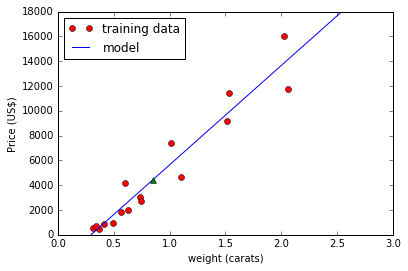

In [16]:
plt.plot(X,y,'ro') #'ro', r--> red, o--> 圈圈; 你可以試試 'g^'
plt.ylim(0,18000)
plt.xlabel("weight (carats)")  #Feature X
plt.ylabel("Price (US$)")   #Label y
line = np.linspace(0, 3, num=100).reshape(-1, 1)  #以np.linespace().reshape(-1,1) 產生測試資料 line
plt.plot(line, lrModel.predict(line))              #將 line 以 lrModel.predict() 預測並畫圖
ax = plt.gca()
plt.legend(["training data","model"], loc="best")
plt.plot(carats,lrModel.predict(carats)[0],'g^')  #將預測結果以 'g^' 畫出